# Project

## Download Data

In [1]:
import urllib
import json
import pandas as pd
from bd_addons.interpro_data import *
from bd_addons.HmmPy import *
from bd_addons.metrics import *
from Bio import SearchIO, SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
sns.set_theme()
sns.set_style("whitegrid")

url = "https://www.ebi.ac.uk/interpro/api/protein/reviewed/entry/pfam/pf03060?format=json"

In [2]:
metadata, entries, gt = get_data(url, 1)


# 8 - Evaluate Ability of Matching sequences
Once we made the PSI-BLAST e HMM-searches we will have some files where all the sequences are... we should:

- Find a format that we can parse (there should be options in the documentations of thevarious methods);
- Decide a threshold for the E-value and take all the hits that are below that E value;
- All the remaining sequences (call them OUT_SEQs)are the ones that, according to our model, belong to the Domain family.
- Make a Confusion Matrix comparing OUT_SEQs with the ground truth.
- compute accuracy, sensitivity, specificty etc

## HMM Searches Performance

In [3]:
metrics_df, parsed_tblouts, parsed_domtblouts, parsed_psiblast = metrics_8(gt)

In [4]:
metrics_df

,accuracy,precision,recall,specificity,balanced_accuracy,mcc,f1_score
hmmsearch_out_C_1_denoised1_swissprot.domtblout,0.996202,0.010624,1.000000,0.996202,0.998101,0.102875,0.021024
hmmsearch_out_C_1_swissprot.domtblout,0.996230,0.010703,1.000000,0.996230,0.998115,0.103258,0.021179
hmmsearch_out_M_1.domtblout,0.996236,0.010718,1.000000,0.996235,0.998118,0.103331,0.021208
hmmsearch_out_O_1.domtblout,0.996230,0.010703,1.000000,0.996230,0.998115,0.103258,0.021179
out_psiblast_C_1_denoised1_swissprot_1iterations.xml,0.999759,0.140127,0.956522,0.999761,0.978141,0.366060,0.244444
out_psiblast_C_1_denoised1_swissprot_2iterations.xml,0.999083,0.042593,1.000000,0.999083,0.999542,0.206285,0.081705
out_psiblast_C_1_denoised1_swissprot_3iterations.xml,0.998876,0.035008,1.000000,0.998876,0.999438,0.186998,0.067647
out_psiblast_C_1_swissprot_1iterations.xml,0.999817,0.177419,0.956522,0.999819,0.978170,0.411912,0.299320
out_psiblast_C_1_swissprot_2iterations.xml,0.999131,0.044834,1.000000,0.999131,0.999566,0.211649,0.085821
out_psiblast_C_1_swissprot_3iterations.xml,0.998977,0.038333,1.000000,0.998977,0.999488,0.195689,0.073836


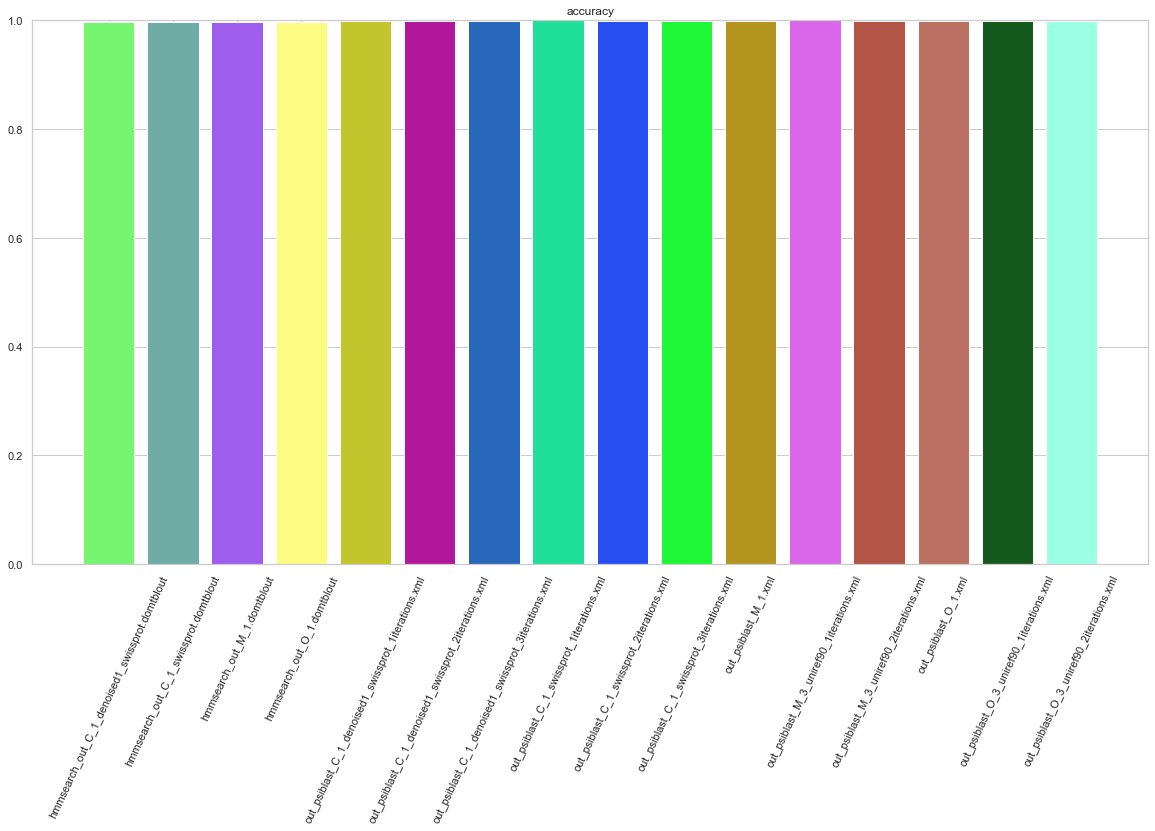

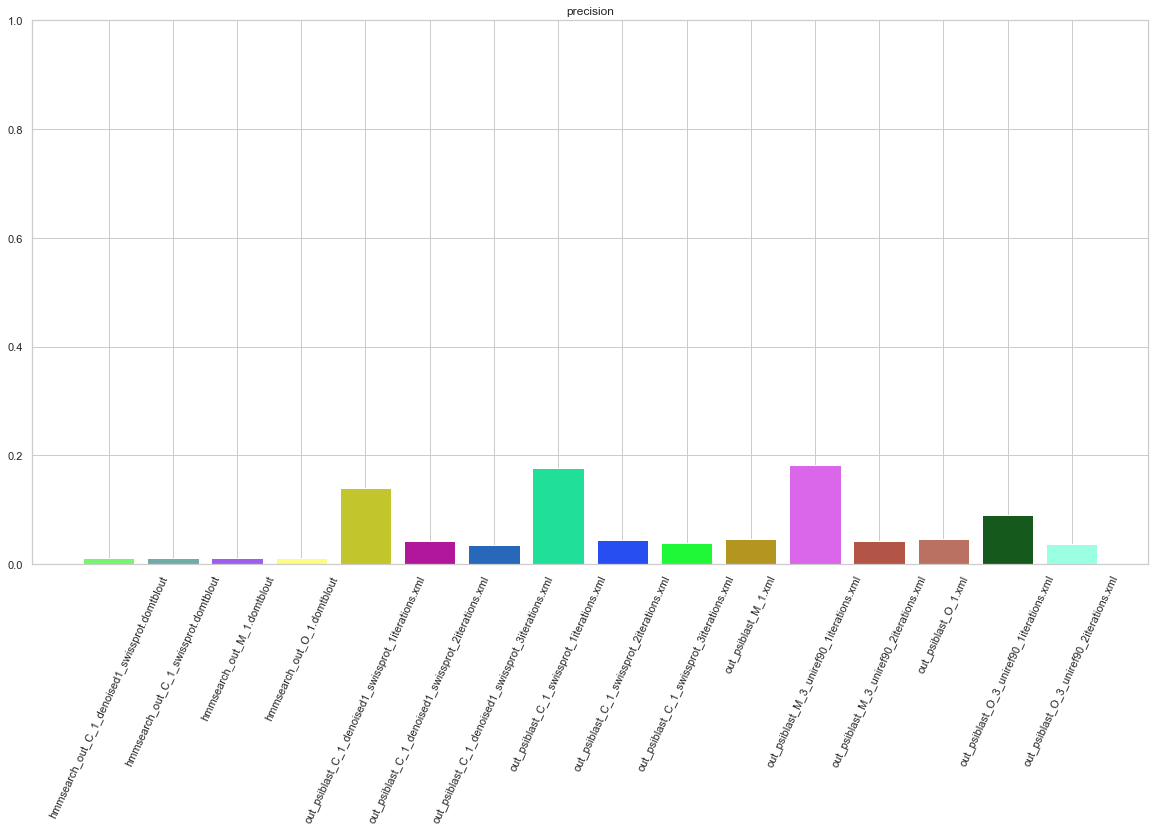

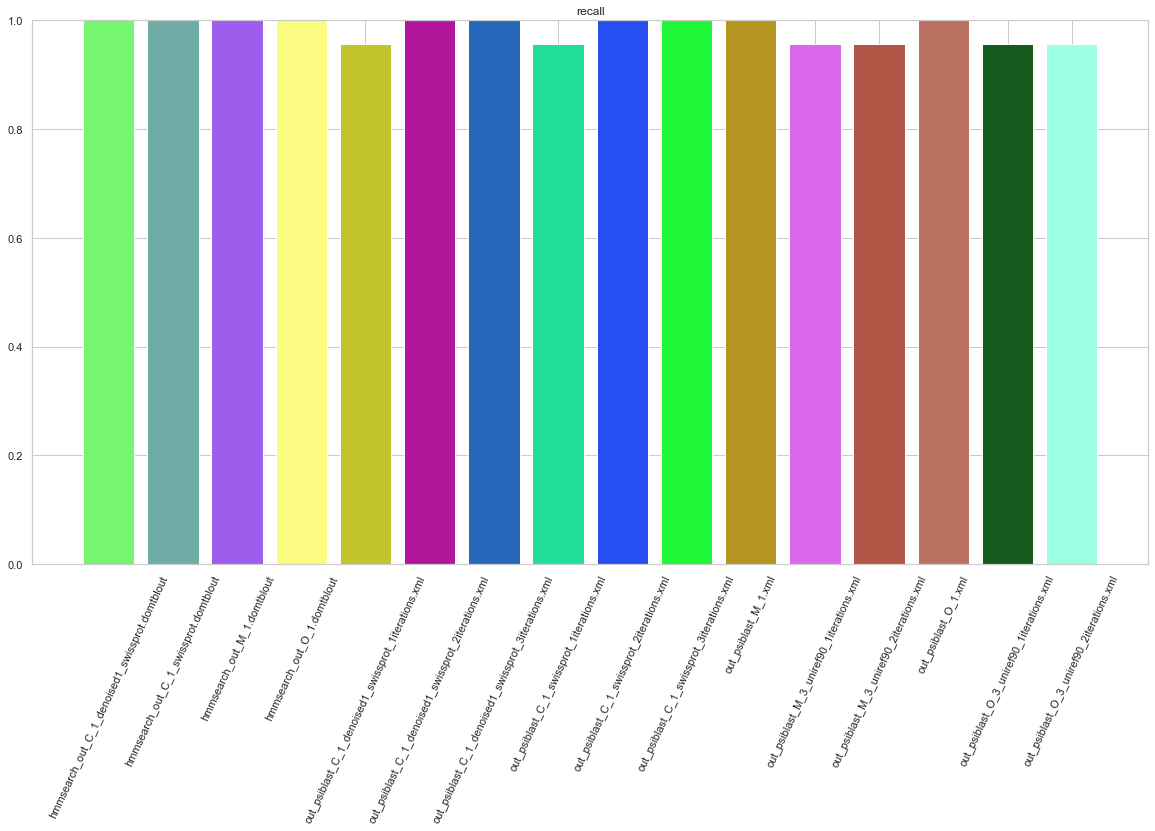

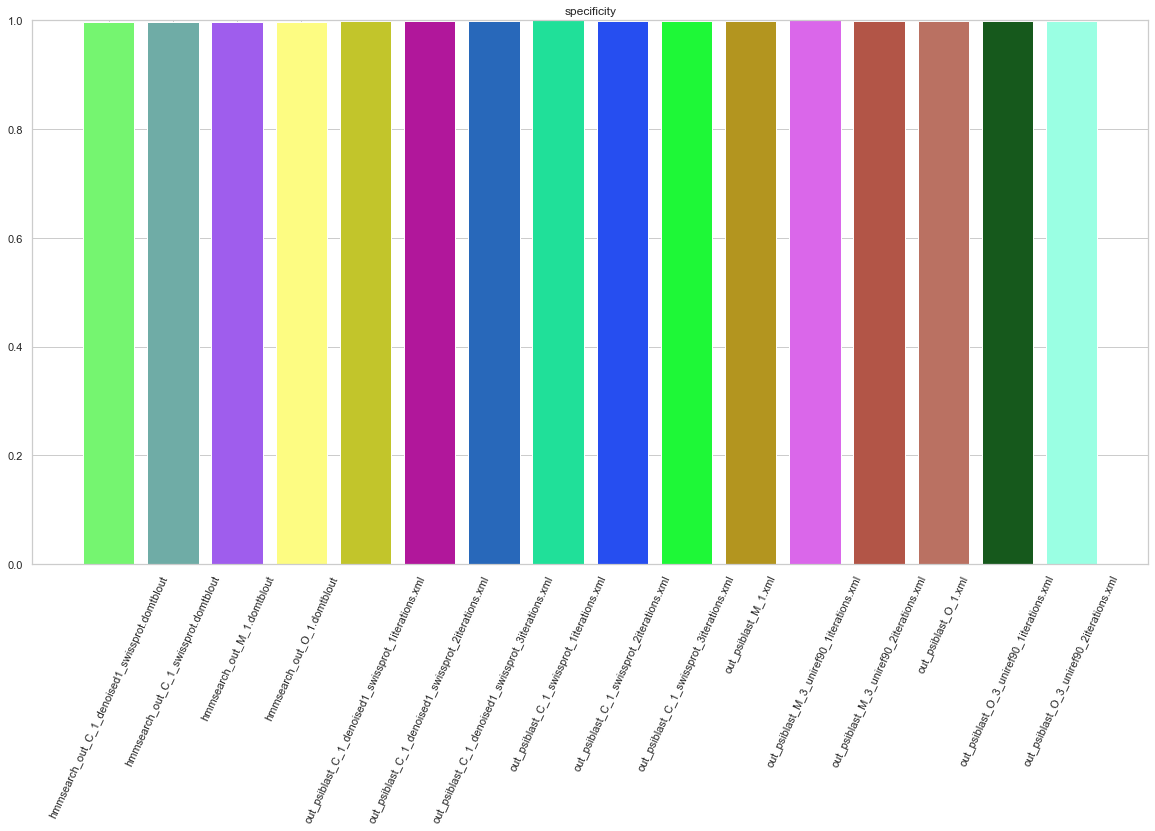

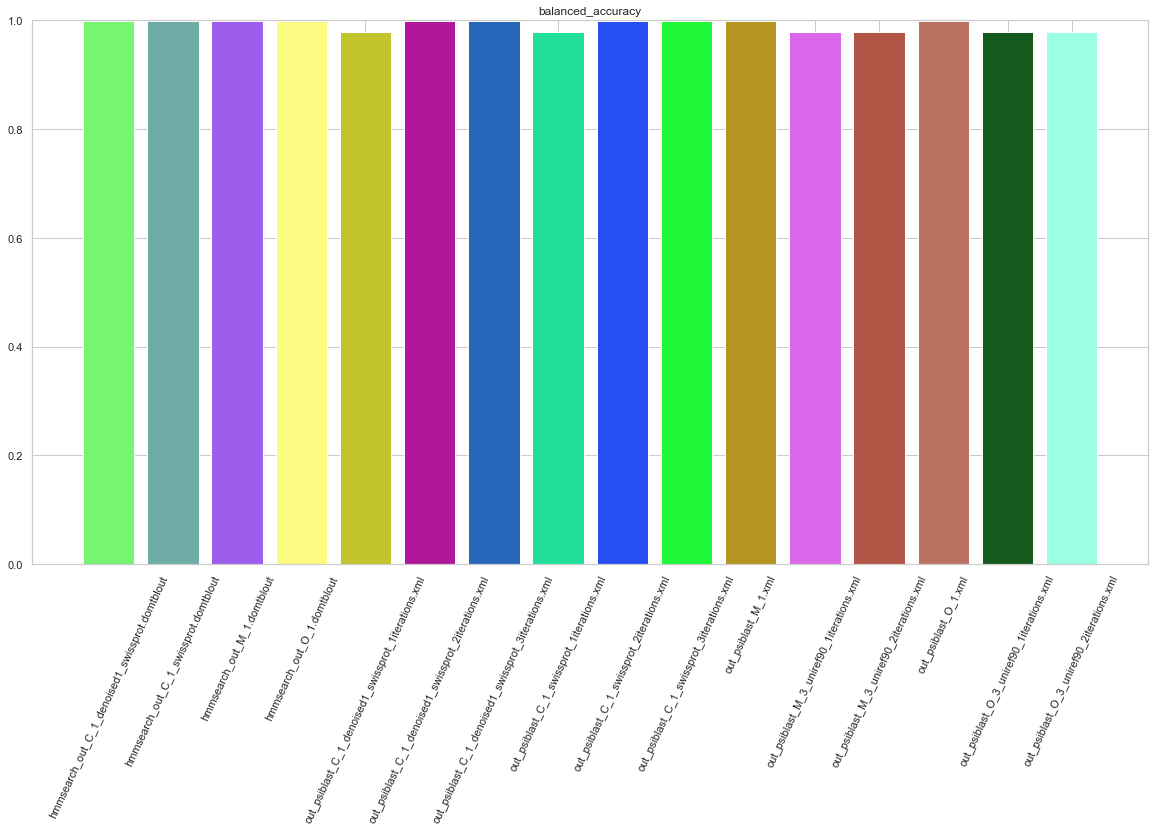

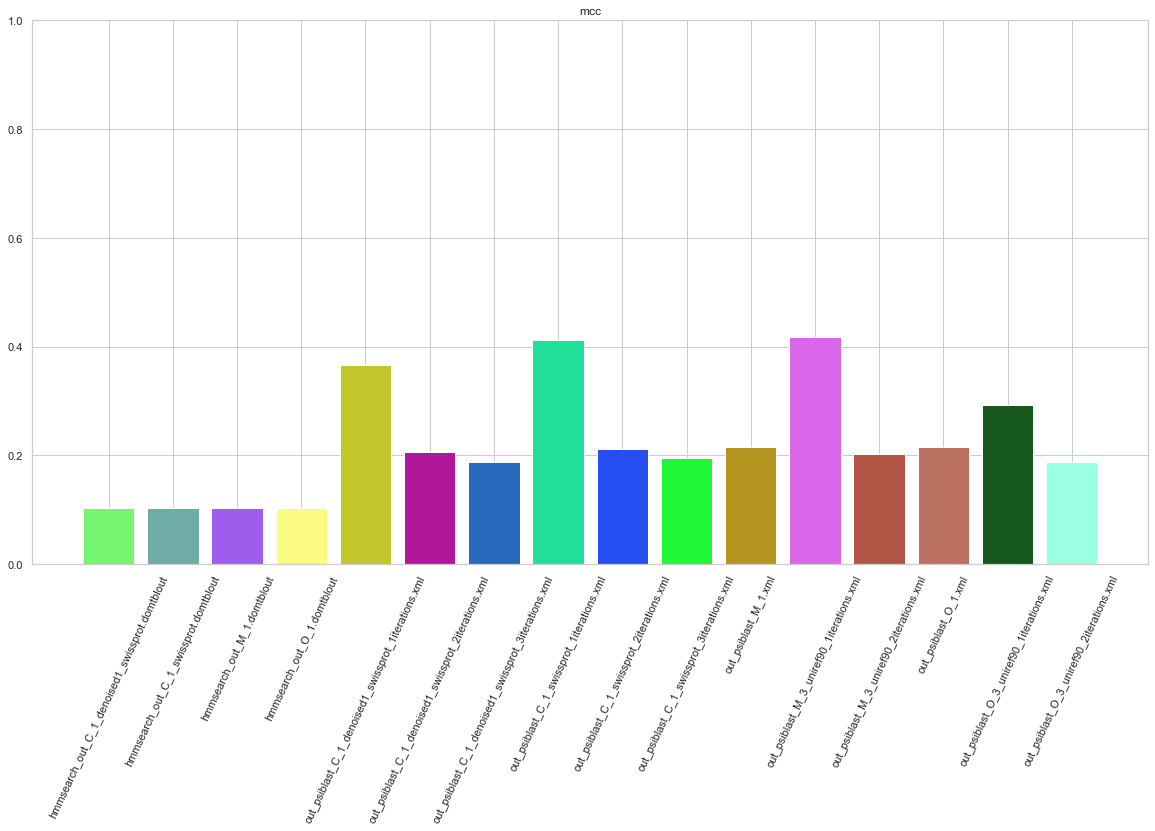

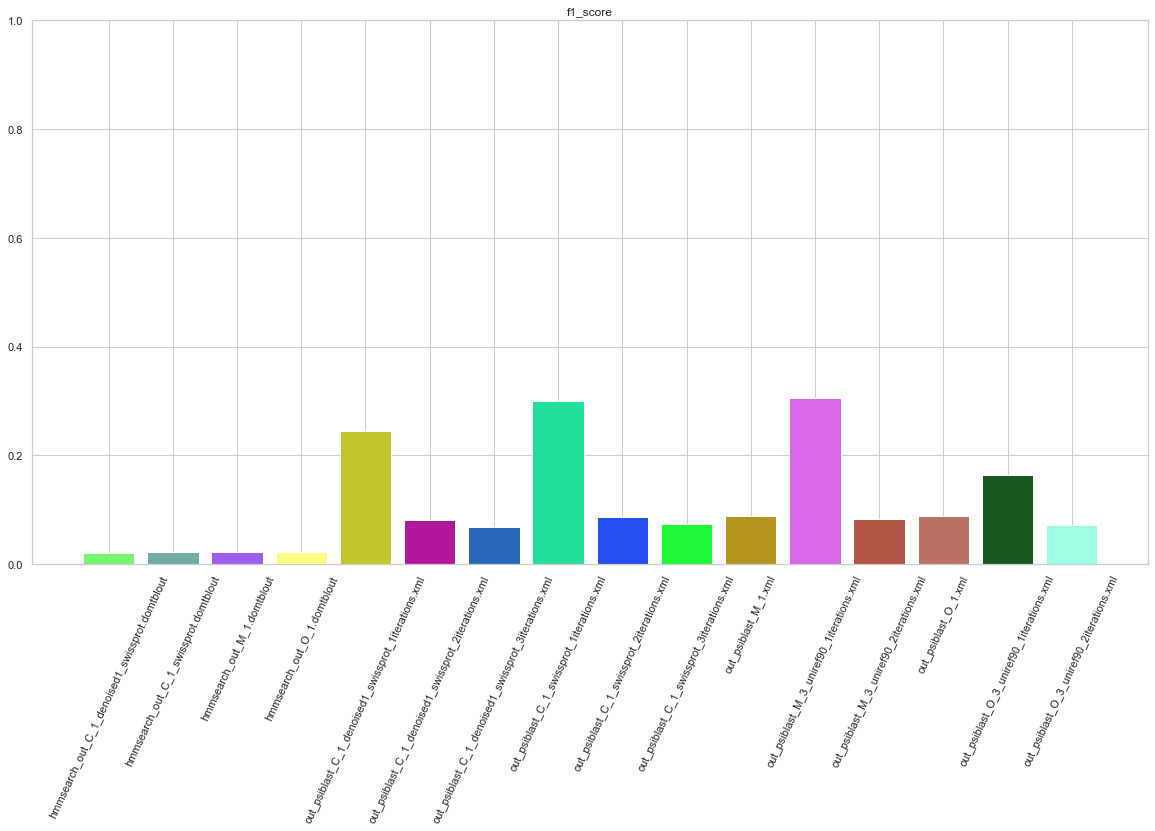

In [6]:
col= list(metrics_df.columns)
x = np.arange(metrics_df.shape[0])
c = np.random.rand(metrics_df.shape[0],3)
for i in col:
    fig, ax = plt.subplots(figsize=(20,10))
    ax.bar(metrics_df.index,list(metrics_df[i]), color = c)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df.index, rotation=65)
    ax.set_ylim((0,1))
    plt.title(i)
    #fig.savefig(i+".png")

# 9 - Evualuate the ability of matching domain positions